## Wearable Tech: Week 4 Assignment

### Step 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("../Data/FH.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])

In [2]:
df

,Unnamed: 0,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,AthleteID
Timestamp,,,,,,,,,,
2018-09-30 12:21:49,0,0.00,0.06,-0.041234,0.00,42.263222,-83.741055,122,0.0,Athlete 1
2018-09-30 12:21:49,1,0.10,0.06,-0.025926,0.00,42.263223,-83.741055,122,0.0,Athlete 1
2018-09-30 12:21:49,2,0.20,0.06,-0.011945,0.00,42.263223,-83.741055,122,0.0,Athlete 1
2018-09-30 12:21:49,3,0.30,0.09,0.048539,0.00,42.263223,-83.741055,122,0.0,Athlete 1
2018-09-30 12:21:49,4,0.40,0.08,0.021406,0.00,42.263223,-83.741055,122,0.0,Athlete 1
...,...,...,...,...,...,...,...,...,...,...
2018-08-19 17:46:54,5224149,8749.53,0.00,-0.000012,7269.15,40.014995,-83.024139,85,615.6,Athlete 10
2018-08-19 17:46:54,5224150,8749.63,0.00,-0.000012,7269.15,40.014995,-83.024139,85,615.6,Athlete 10
2018-08-19 17:46:54,5224151,8749.73,0.00,-0.000012,7269.15,40.014994,-83.024139,85,615.6,Athlete 10


### Step 2

In [3]:
df.index = pd.to_datetime(df.index)
df = df.loc['2018-08-19']
df

,Unnamed: 0,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,AthleteID
Timestamp,,,,,,,,,,
2018-08-19 15:21:05,230155,0.00,0.0,-0.000012,0.00,40.013273,-83.024196,0,0.0,Athlete 11
2018-08-19 15:21:05,230156,0.11,0.0,-0.000012,0.00,40.013273,-83.024196,0,0.0,Athlete 11
2018-08-19 15:21:05,230157,0.21,0.0,-0.000012,0.00,40.013273,-83.024196,0,0.0,Athlete 11
2018-08-19 15:21:05,230158,0.31,0.0,-0.000012,0.00,40.013273,-83.024196,0,0.0,Athlete 11
2018-08-19 15:21:05,230159,0.41,0.0,-0.000012,0.00,40.013273,-83.024196,0,0.0,Athlete 11
...,...,...,...,...,...,...,...,...,...,...
2018-08-19 17:46:54,5224149,8749.53,0.0,-0.000012,7269.15,40.014995,-83.024139,85,615.6,Athlete 10
2018-08-19 17:46:54,5224150,8749.63,0.0,-0.000012,7269.15,40.014995,-83.024139,85,615.6,Athlete 10
2018-08-19 17:46:54,5224151,8749.73,0.0,-0.000012,7269.15,40.014994,-83.024139,85,615.6,Athlete 10


### Step 3

In [10]:
zero_hr_count = (df['Heart Rate'] == 0).sum()

zero_hr_count

463914

### Step 4

In [11]:
missing_hr_percentage = df.groupby('AthleteID')['Heart Rate'].apply(lambda x: ((x == 0).sum() / len(x)) * 100)

valid_athletes = missing_hr_percentage[missing_hr_percentage < 10].index.tolist()

filtered_df = df[df['AthleteID'].isin(valid_athletes)]

In [16]:
missing_hr_percentage.sort_values(ascending=False)

AthleteID
Athlete 2     90.382551
Athlete 23    65.064451
Athlete 4     62.815084
Athlete 7     59.340672
Athlete 17    51.097223
Athlete 5     49.435992
Athlete 11    43.669125
Athlete 21    43.581371
Athlete 22    41.178778
Athlete 1     22.283415
Athlete 18    11.043584
Athlete 20     4.777577
Athlete 24     0.897346
Athlete 13     0.603694
Athlete 19     0.273461
Athlete 15     0.251824
Athlete 6      0.238022
Athlete 10     0.038152
Athlete 12     0.008107
Athlete 3      0.000000
Athlete 9      0.000000
Name: Heart Rate, dtype: float64

### Step 5

In [19]:
df_sorted = df.sort_values(by=['AthleteID', 'Seconds'])

# Calculate the PL delta for each athlete
df_sorted['PL_delta'] = df_sorted.groupby('AthleteID')['Player Load'].diff()

# Remove rows where PL delta is negative
df_filtered = df_sorted[df_sorted['PL_delta'] >= 0]

df_filtered

,Unnamed: 0,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,AthleteID,PL_delta
Timestamp,,,,,,,,,,,
2018-08-19 15:21:05,3296443,0.10,0.00,-0.000012,0.00,40.013191,-83.024188,0,0.0,Athlete 1,0.0
2018-08-19 15:21:05,3296444,0.20,0.00,-0.000012,0.00,40.013191,-83.024188,0,0.0,Athlete 1,0.0
2018-08-19 15:21:05,3296445,0.39,0.00,-0.000012,0.00,40.013191,-83.024188,0,0.0,Athlete 1,0.0
2018-08-19 15:21:05,3296446,0.50,0.00,-0.000012,0.00,40.013191,-83.024188,0,0.0,Athlete 1,0.0
2018-08-19 15:21:05,3296447,0.60,0.00,-0.000012,0.00,40.013191,-83.024188,0,0.0,Athlete 1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-19 17:46:54,1421782,8749.53,3.08,0.321160,9232.13,40.015116,-83.023825,193,766.9,Athlete 9,0.0
2018-08-19 17:46:54,1421783,8749.63,3.12,0.333371,9232.45,40.015115,-83.023828,193,766.9,Athlete 9,0.0
2018-08-19 17:46:54,1421784,8749.73,3.15,0.315031,9232.78,40.015113,-83.023831,193,767.0,Athlete 9,0.1


### Step 6

In [20]:
import pandas as pd

df_sorted = df.sort_values(by=['AthleteID', 'Seconds'])

# Calculate rolling player load change values over different time windows (30, 60, and 90 seconds)
df_sorted['PL_change_30s'] = df_sorted.groupby('AthleteID')['Player Load'].diff(periods=30)
df_sorted['PL_change_60s'] = df_sorted.groupby('AthleteID')['Player Load'].diff(periods=60)
df_sorted['PL_change_90s'] = df_sorted.groupby('AthleteID')['Player Load'].diff(periods=90)

# Calculate the Pearson correlation coefficient (r) between Heart Rate and rolling player load change values
correlation_30s = df_sorted['Heart Rate'].corr(df_sorted['PL_change_30s'])
correlation_60s = df_sorted['Heart Rate'].corr(df_sorted['PL_change_60s'])
correlation_90s = df_sorted['Heart Rate'].corr(df_sorted['PL_change_90s'])

print("Pearson correlation coefficient (r) for 30-second rolling player load change:", correlation_30s)
print("Pearson correlation coefficient (r) for 60-second rolling player load change:", correlation_60s)
print("Pearson correlation coefficient (r) for 90-second rolling player load change:", correlation_90s)


Pearson correlation coefficient (r) for 30-second rolling player load change: 0.13298624207075907
Pearson correlation coefficient (r) for 60-second rolling player load change: 0.1448136730174516
Pearson correlation coefficient (r) for 90-second rolling player load change: 0.15318087443717


### Step 7

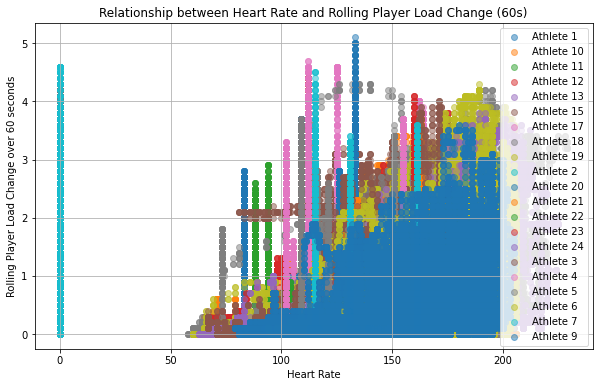

In [22]:
# Sort the DataFrame by 'AthleteID' and 'Seconds' to ensure data is in chronological order
df_sorted = df.sort_values(by=['AthleteID', 'Seconds'])

# Calculate rolling player load change over 60 seconds
df_sorted['PL_change_60s'] = df_sorted.groupby('AthleteID')['Player Load'].diff(periods=60)

# Drop NaN values from the DataFrame
df_sorted.dropna(subset=['PL_change_60s'], inplace=True)

# Group by 'AthleteID' and plot scatter for each group
fig, ax = plt.subplots(figsize=(10, 6))
for athlete, data in df_sorted.groupby('AthleteID'):
    ax.scatter(data['Heart Rate'], data['PL_change_60s'], label=athlete, alpha=0.5)

ax.set_xlabel('Heart Rate')
ax.set_ylabel('Rolling Player Load Change over 60 seconds')
ax.set_title('Relationship between Heart Rate and Rolling Player Load Change (60s)')
ax.legend()
plt.grid(True)
plt.show()


### Step 8

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named df
# Assuming 'Heart Rate' is the column representing heart rate data
# Assuming 'Player Load' is the column representing player load data
# Assuming 'AthleteID' is the column representing individual athletes
# Assuming 'Timestamp' is the index representing the timestamp

# Sort the DataFrame by 'AthleteID' and 'Timestamp' to ensure data is in chronological order
df_sorted = df.sort_values(by=['AthleteID', 'Timestamp'])

# Calculate rolling player load change over 60 seconds
df_sorted['PL_change_60s'] = df_sorted.groupby('AthleteID')['Player Load'].diff(periods=60)

# Drop NaN values from the DataFrame
df_sorted.dropna(subset=['PL_change_60s'], inplace=True)

# Identify athletes with good data on both days
athletes_day1 = set(df_sorted[df_sorted.index.day == 1]['AthleteID'])
athletes_day2 = set(df_sorted[df_sorted.index.day == 2]['AthleteID'])
athletes_with_good_data = list(athletes_day1.intersection(athletes_day2))

# Create a DataFrame to store results
results = pd.DataFrame(columns=['AthleteID', 'Day', 'Slope', 'Intercept'])

# Loop through each athlete with good data on both days
for athlete in athletes_with_good_data:
    # Filter data for the athlete on each day
    athlete_day1_data = df_sorted[(df_sorted['AthleteID'] == athlete) & (df_sorted.index.day == 1)]
    athlete_day2_data = df_sorted[(df_sorted['AthleteID'] == athlete) & (df_sorted.index.day == 2)]
    
    # Perform linear regression for day 1
    X_day1 = athlete_day1_data['Heart Rate'].values.reshape(-1, 1)
    y_day1 = athlete_day1_data['PL_change_60s'].values
    lr_day1 = LinearRegression()
    lr_day1.fit(X_day1, y_day1)
    
    # Perform linear regression for day 2
    X_day2 = athlete_day2_data['Heart Rate'].values.reshape(-1, 1)
    y_day2 = athlete_day2_data['PL_change_60s'].values
    lr_day2 = LinearRegression()
    lr_day2.fit(X_day2, y_day2)
    
    # Store results in the DataFrame
    results = results.append({'AthleteID': athlete,
                              'Day': 'day1',
                              'Slope': lr_day1.coef_[0],
                              'Intercept': lr_day1.intercept_}, ignore_index=True)
    
    results = results.append({'AthleteID': athlete,
                              'Day': 'day2',
                              'Slope': lr_day2.coef_[0],
                              'Intercept': lr_day2.intercept_}, ignore_index=True)

# Compare and contrast the values between the two days
print("Comparison of linear regression coefficients (Slope) and intercepts (Y-intercept) between the two days:")
print(results)

# Convert 'Slope' column to numeric data type
results['Slope'] = pd.to_numeric(results['Slope'], errors='coerce')

# Identify the top 2 players on both days
top_players_day1 = results[results['Day'] == 'day1'].nlargest(2, 'Slope')
top_players_day2 = results[results['Day'] == 'day2'].nlargest(2, 'Slope')

print("\nTop 2 players on day 1:")
print(top_players_day1)
print("\nTop 2 players on day 2:")
print(top_players_day2)



Comparison of linear regression coefficients (Slope) and intercepts (Y-intercept) between the two days:
Empty DataFrame
Columns: [AthleteID, Day, Slope, Intercept]
Index: []

Top 2 players on day 1:
Empty DataFrame
Columns: [AthleteID, Day, Slope, Intercept]
Index: []

Top 2 players on day 2:
Empty DataFrame
Columns: [AthleteID, Day, Slope, Intercept]
Index: []
